# World Happiness Report Project

**Project Description:**
    The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

**What is Dystopia?**
    Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

**What are the residuals?**
    The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

**What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?**
    The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.
Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading dataset
df=pd.read_csv("C://Users//rahul//OneDrive//Desktop//data trained//internship//Sample project//pro ph 2//happiness_score_dataset.csv")

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
#checking null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
# for preprocessing importing necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
le = LabelEncoder()

In [12]:
df['Region'] = le.fit_transform(df['Region'])

In [13]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


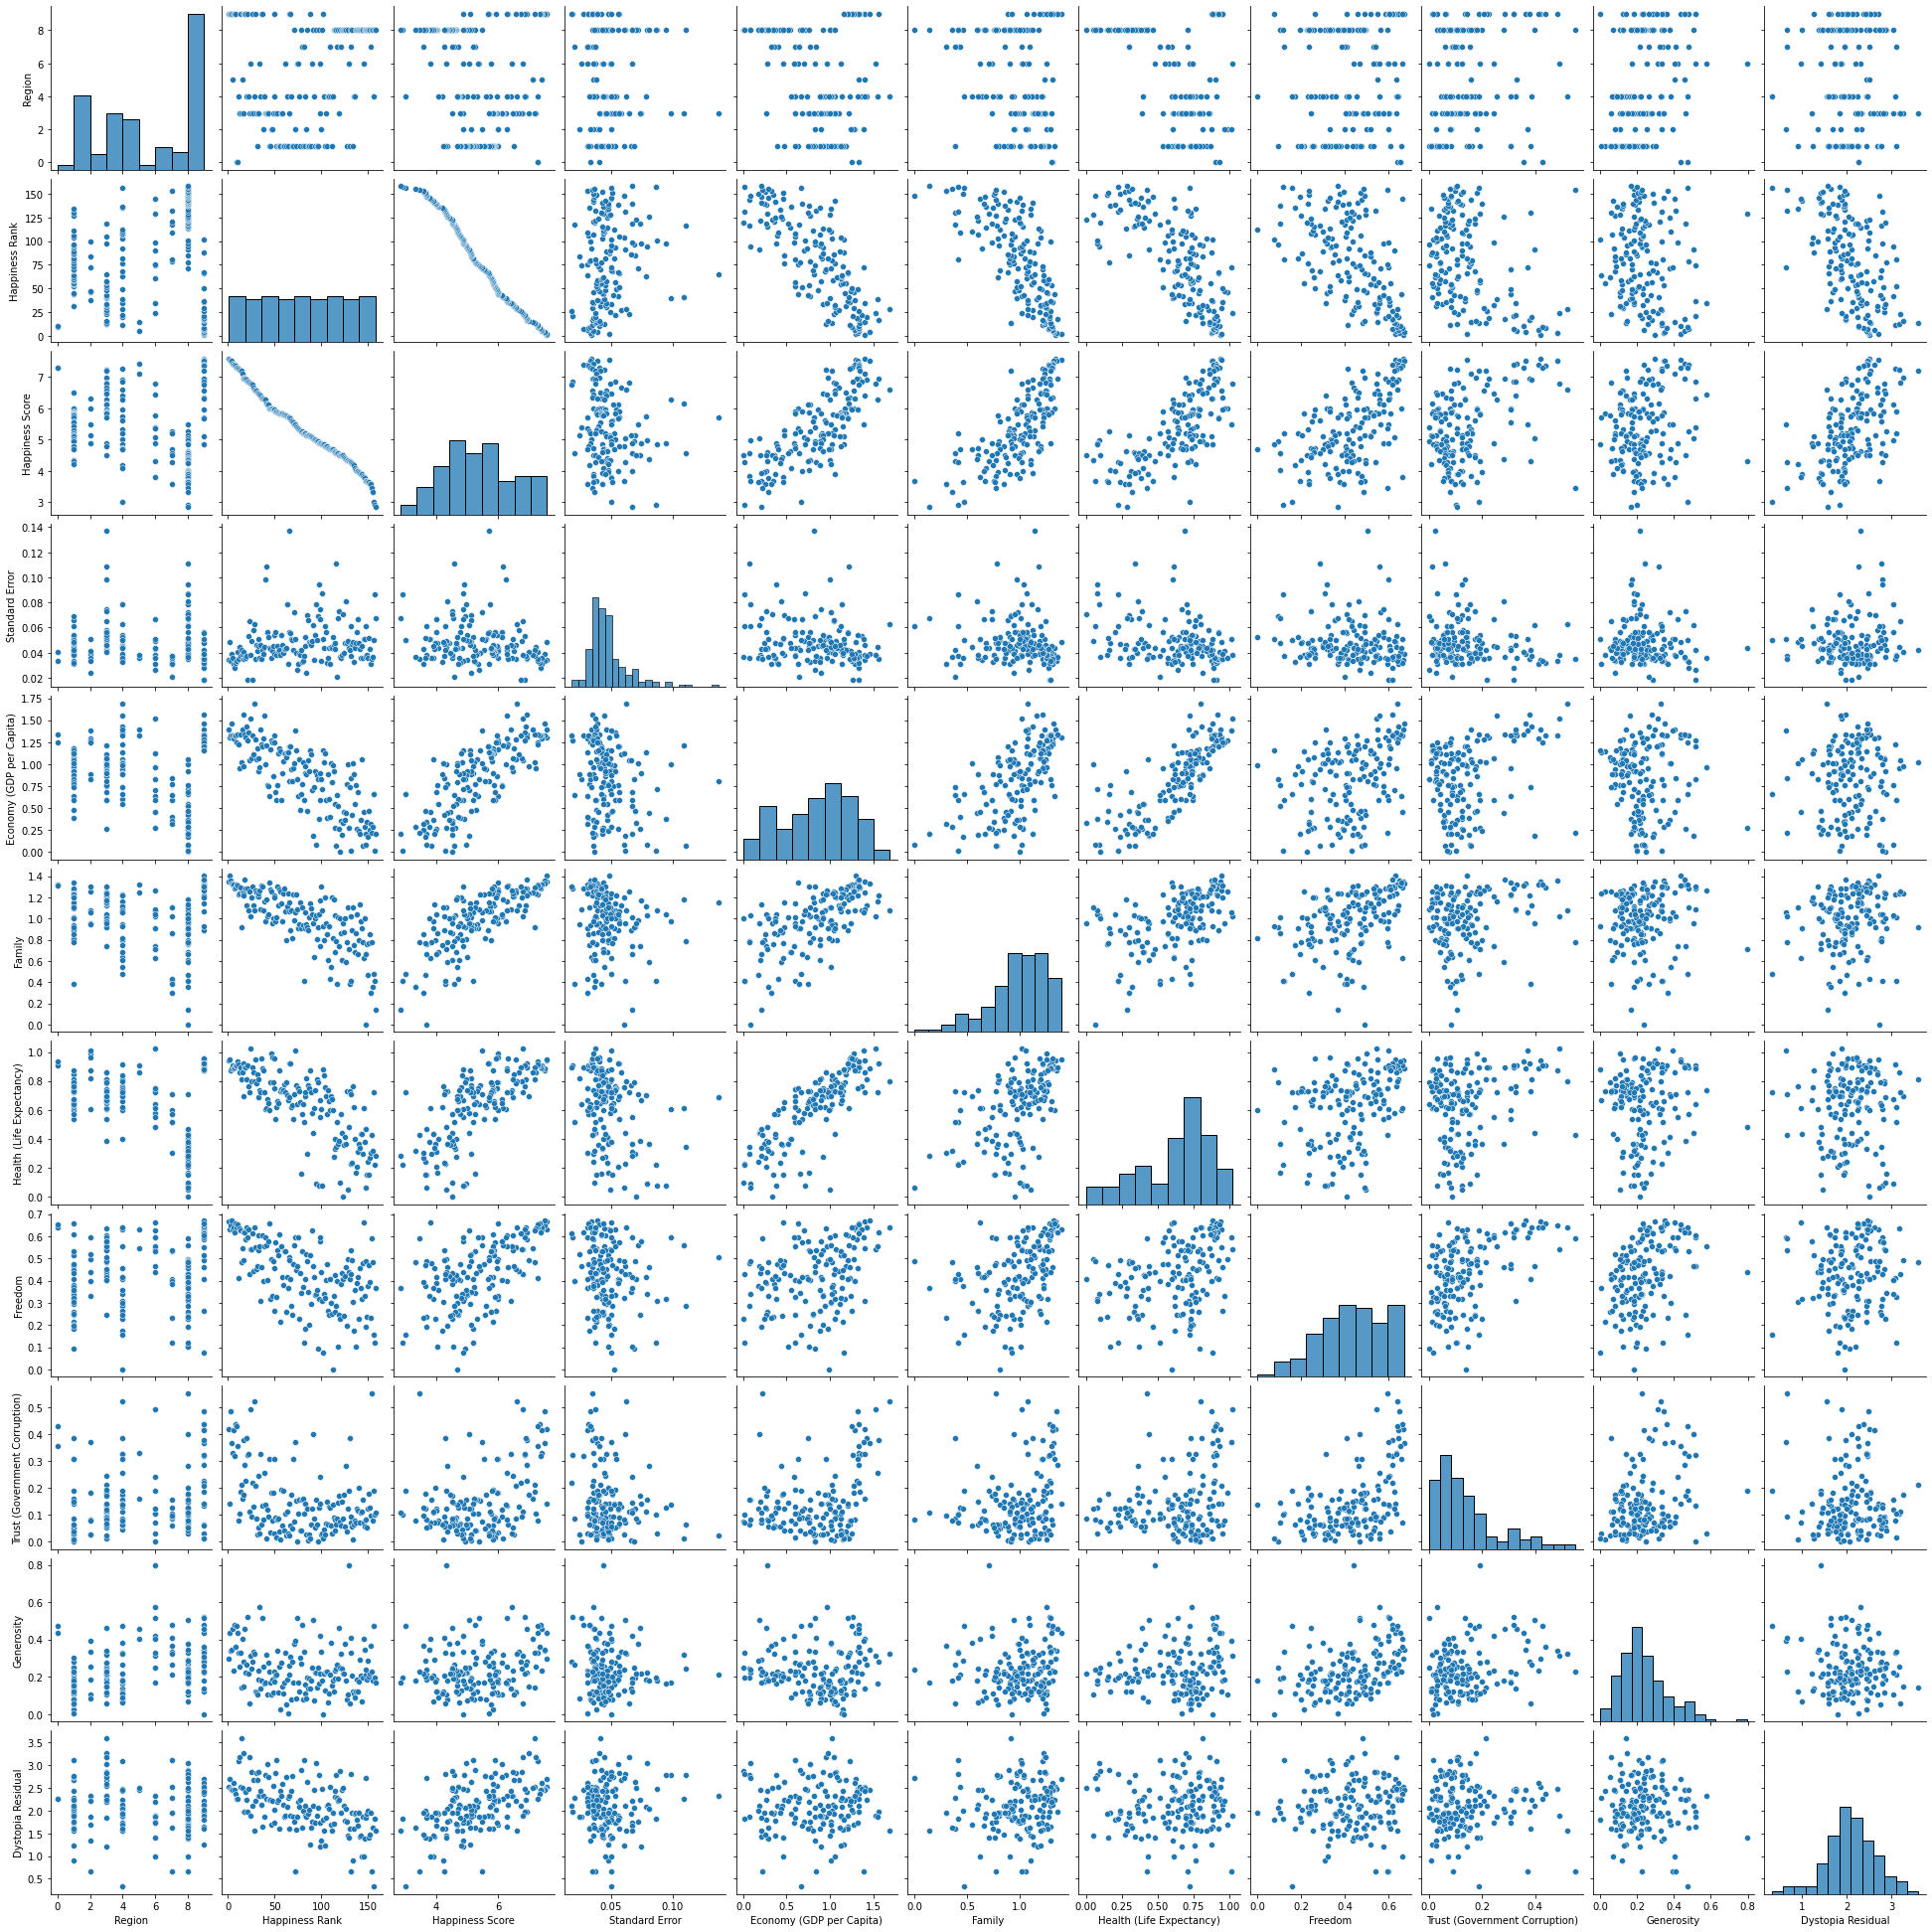

In [14]:
#visualise the relationship
sns.pairplot(df)
plt.show()

In [22]:
x=df.drop(['Happiness Score','Country'], axis=1)
y=df['Happiness Score']

In [23]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [24]:
x_train

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
137,8,138,0.05602,0.26074,1.03526,0.20583,0.38857,0.12352,0.18798,1.79293
55,1,56,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649
126,1,127,0.04763,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
84,8,85,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
154,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
...,...,...,...,...,...,...,...,...,...,...
71,2,72,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
106,4,107,0.03589,0.88113,0.60429,0.73793,0.26268,0.06358,0.06431,2.12466
14,5,15,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
92,1,93,0.05376,0.91851,1.00232,0.73545,0.33457,0.05327,0.22359,1.73933


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [25]:
#Linear regression model
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [26]:
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred))
print("R2 Score: ", r2_score(y_test, pred))

Mean Squared Error:  7.883523771378892e-08
Mean Absolute Error:  0.00024318224562647206
R2 Score:  0.999999944433339


In [27]:
#Decision Tree model
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred = dtr.predict(x_test)

In [28]:
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred))
print("R2 Score: ", r2_score(y_test, pred))

Mean Squared Error:  0.0033567499999999978
Mean Absolute Error:  0.04312499999999994
R2 Score:  0.997634009929402


In [29]:
# Random forest model
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred = rfr.predict(x_test)

In [30]:
print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred))
print("R2 Score: ", r2_score(y_test, pred))

Mean Squared Error:  0.002902897837499959
Mean Absolute Error:  0.03215874999999896
R2 Score:  0.9979539055754866
